# Global CEO Turnover, 2018 - 2023

The aim of this project is to analyse and visualise data relating to *CEO Turnover* across 12 major global market indices, spanning 1822 companies. 

The data comprises two categories:
- 1) Outgoing CEOs: CEOs that have left their role sometime between 1 January 2018 - 30 June 2023
- 2) Incoming CEOs: CEOs that have joined their role sometime between 1 January 2018 - 30 June 2023

For each outgoing or incoming CEO, data on company market index (e.g. S&P 500), latest reported revenues, market capitlisation, gender and appointment (whether appointed internally from within the company, or externally from outside the company) is available.  

Data was sourced from BoardEx.com. 

This notebook details the loading and cleaning process, as follows:

- 1) <b>Load and clean the data</b>: using pandas, the data is loaded and checked for missing values and data type consistency. 
- 2) <b>Data analysis and manipulation</b>: grouping the data and calculating summary statistics to gain a better undrstanding of the data structure
- 3) <b>Exploratory Data Analysis (EDA)</b>: basic visualisations to understand relationships and view distirbution and shape of the data

## 1. Load and clean the data

In [4]:
# Load the data

import pandas as pd

# Load the data
outgoing_ceos = pd.read_excel("CEO_data.xlsx", sheet_name="Outgoing CEOs")
incoming_ceos = pd.read_excel("CEO_data.xlsx", sheet_name="Incoming CEOs")


In [5]:
# Display the first few rows of each dataframe
print(outgoing_ceos.head())
print(incoming_ceos.head())


     index    country                    person_name      unique_id  \
0  ASX 200  Australia             Jeanne Marie Johns   605191603644   
1  ASX 200  Australia  Garold (Gerry) Ralph Spindler   159382935940   
2  ASX 200  Australia    Steven (Steve) Anthony Cain   235022950743   
3  ASX 200  Australia                  Thomas Beregi  6419571093465   
4  ASX 200  Australia                      Raj Naran  1059578743830   

   individual_id  company_id   age  gender  \
0         605191      603644  60.0  Female   
1          15938     2935940  75.0    Male   
2          23502     2950743  58.0    Male   
3         641957     1093465   NaN    Male   
4        1059578      743830   NaN    Male   

                                       company_name dual_listed  ...  \
0                             INCITEC PIVOT LIMITED          No  ...   
1                     CORONADO GLOBAL RESOURCES INC          No  ...   
2                                   COLES GROUP LTD          No  ...   
3       

In [6]:
# Check for missing values

print(outgoing_ceos.isnull().sum())
print(incoming_ceos.isnull().sum())


index               0
country             0
person_name         0
unique_id           0
individual_id       0
company_id          0
age                47
gender              0
company_name        0
dual_listed         0
ticker              1
role_name           0
role_start_date     2
role_end_date       0
tenure_days         2
tenure_year         0
end_year            0
end_month           0
end_quarter         0
end_half            0
sector_bx           0
industry            0
appointment         0
revenue             5
market_cap          1
dtype: int64
index                0
country              0
person_name          0
unique_id            0
individual_id        0
company_id           0
age                114
gender               0
company_name         0
dual_listed          0
ticker               1
role_name            0
role_start_date      0
role_end_date        0
tenure_days          0
tenure_year          0
start_year           0
start_month          0
start_quarter        0


In [8]:
# Drop uneccessary columns (age)
outgoing_ceos.drop('age', axis=1, inplace=True)
incoming_ceos.drop('age', axis=1, inplace=True)


In [9]:
# Replace missing values in revenue columns with median value
# Calculate the mean revenue
outgoing_mean_revenue = outgoing_ceos['revenue'].mean()
incoming_mean_revenue = incoming_ceos['revenue'].mean()

# Fill in the missing values with the mean
outgoing_ceos['revenue'].fillna(outgoing_mean_revenue, inplace=True)
incoming_ceos['revenue'].fillna(incoming_mean_revenue, inplace=True)


In [10]:
# Check data types
print(outgoing_ceos.dtypes)
print(incoming_ceos.dtypes)


index                      object
country                    object
person_name                object
unique_id                   int64
individual_id               int64
company_id                  int64
gender                     object
company_name               object
dual_listed                object
ticker                     object
role_name                  object
role_start_date    datetime64[ns]
role_end_date      datetime64[ns]
tenure_days               float64
tenure_year               float64
end_year                    int64
end_month                   int64
end_quarter                 int64
end_half                   object
sector_bx                  object
industry                   object
appointment                object
revenue                   float64
market_cap                float64
dtype: object
index                      object
country                    object
person_name                object
unique_id                   int64
individual_id               int64


In [14]:
# Reaplce 'Current' role end date with today's date

from datetime import datetime

# Replace 'Current' with today's date
incoming_ceos['role_end_date'] = incoming_ceos['role_end_date'].replace('Current', pd.Timestamp(datetime.today()))

# Convert role_end_date to datetime
incoming_ceos['role_end_date'] = pd.to_datetime(incoming_ceos['role_end_date'])

# Check data types
print(outgoing_ceos.dtypes)
print(incoming_ceos.dtypes)


index                      object
country                    object
person_name                object
unique_id                   int64
individual_id               int64
company_id                  int64
gender                     object
company_name               object
dual_listed                object
ticker                     object
role_name                  object
role_start_date    datetime64[ns]
role_end_date      datetime64[ns]
tenure_days               float64
tenure_year               float64
end_year                    int64
end_month                   int64
end_quarter                 int64
end_half                   object
sector_bx                  object
industry                   object
appointment                object
revenue                   float64
market_cap                float64
dtype: object
index                      object
country                    object
person_name                object
unique_id                   int64
individual_id               int64


## 2. Data Analysis and Manipulation

In [48]:
# Group data to understand the distirbution of CEOs across certain variables 


incoming_ceos_by_year_country = incoming_ceos.groupby(['start_year', 'index', 'gender', 'appointment']).size().reset_index(name='count')
outgoing_ceos_by_year_country = outgoing_ceos.groupby(['end_year', 'index', 'gender', 'appointment']).size().reset_index(name='count')

# Print the first few rows of each grouped dataframe
print(incoming_ceos_by_year_country.head())
print(outgoing_ceos_by_year_country.head())

   start_year    index  gender appointment  count
0        2018  ASX 200  Female    External      1
1        2018  ASX 200  Female    Internal      3
2        2018  ASX 200    Male    External     15
3        2018  ASX 200    Male    Internal      8
4        2018   CAC 40    Male    Internal      3
   end_year         index gender appointment  count
0      2018       ASX 200   Male    External      6
1      2018       ASX 200   Male    Internal     16
2      2018        CAC 40   Male    Internal      3
3      2018           DAX   Male    Internal      3
4      2018  EURONEXT 100   Male    Internal      8


In [49]:
# Summary statistics

average_market_cap_incoming = incoming_ceos.groupby(['start_year', 'country'])['market_cap'].mean().reset_index(name='avg_market_cap')
average_market_cap_outgoing = outgoing_ceos.groupby(['end_year', 'country'])['market_cap'].mean().reset_index(name='avg_market_cap')

print(average_market_cap_incoming.head())
print(average_market_cap_outgoing.head())

   start_year    country  avg_market_cap
0        2018  Australia    1.109545e+10
1        2018     Canada    9.964319e+09
2        2018     Europe    3.049929e+10
3        2018     France    4.092089e+10
4        2018    Germany    4.006801e+10
   end_year    country  avg_market_cap
0      2018  Australia    1.106151e+10
1      2018     Canada    7.794527e+09
2      2018     Europe    5.380200e+10
3      2018     France    3.876298e+10
4      2018    Germany    1.682930e+10


In [50]:
# CEO change by industry
incoming_ceos_by_sector = incoming_ceos.groupby(['industry']).size().reset_index(name='count')
outgoing_ceos_by_sector = outgoing_ceos.groupby(['industry']).size().reset_index(name='count')

print(incoming_ceos_by_sector)
print(outgoing_ceos_by_sector)

                         industry  count
0                        Consumer    229
1              Financial Services    230
2                      Healthcare     73
3  Industrial & Natural Resources    476
4                      Technology    143
                         industry  count
0                        Consumer    207
1              Financial Services    205
2                      Healthcare     65
3  Industrial & Natural Resources    449
4                      Technology    114


In [51]:
# CEO average tenure
average_tenure_incoming = incoming_ceos['tenure_year'].mean()
average_tenure_outgoing = outgoing_ceos['tenure_year'].mean()

print(average_tenure_incoming)
print(average_tenure_outgoing)

2.5995263201742422
7.796235511064269


In [52]:
# Gender breakdown
incoming_ceos_by_gender = incoming_ceos.groupby(['gender']).size().reset_index(name='count')
outgoing_ceos_by_gender = outgoing_ceos.groupby(['gender']).size().reset_index(name='count')

print(incoming_ceos_by_gender)
print(outgoing_ceos_by_gender)

   gender  count
0  Female    103
1    Male   1048
   gender  count
0  Female     45
1    Male    995


In [53]:
# Appointment type breakdown
incoming_ceos_by_appointment = incoming_ceos.groupby(['appointment']).size().reset_index(name='count')
outgoing_ceos_by_appointment = outgoing_ceos.groupby(['appointment']).size().reset_index(name='count')

print(incoming_ceos_by_appointment)
print(outgoing_ceos_by_appointment)

  appointment  count
0    External    316
1    Internal    835
  appointment  count
0    External    278
1    Internal    762


In [54]:
# Revenue and market cap
average_revenue_incoming = incoming_ceos.groupby(['start_year'])['revenue'].mean().reset_index(name='avg_revenue')
average_revenue_outgoing = outgoing_ceos.groupby(['end_year'])['revenue'].mean().reset_index(name='avg_revenue')

average_market_cap_incoming = incoming_ceos.groupby(['start_year'])['market_cap'].mean().reset_index(name='avg_market_cap')
average_market_cap_outgoing = outgoing_ceos.groupby(['end_year'])['market_cap'].mean().reset_index(name='avg_market_cap')

print(average_revenue_incoming)
print(average_revenue_outgoing)

print(average_market_cap_incoming)
print(average_revenue_outgoing)

   start_year   avg_revenue
0        2018  1.947009e+10
1        2019  1.894729e+10
2        2020  2.095882e+10
3        2021  2.805455e+10
4        2022  1.668998e+10
5        2023  2.278917e+10
   end_year   avg_revenue
0      2018  1.927838e+10
1      2019  1.856542e+10
2      2020  2.011719e+10
3      2021  2.725833e+10
4      2022  2.087952e+10
5      2023  1.786904e+10
   start_year  avg_market_cap
0        2018    2.913351e+10
1        2019    3.531382e+10
2        2020    2.979262e+10
3        2021    4.042382e+10
4        2022    2.203111e+10
5        2023    3.429184e+10
   end_year   avg_revenue
0      2018  1.927838e+10
1      2019  1.856542e+10
2      2020  2.011719e+10
3      2021  2.725833e+10
4      2022  2.087952e+10
5      2023  1.786904e+10


## 3. Exploratory Data Analysis (EDA)

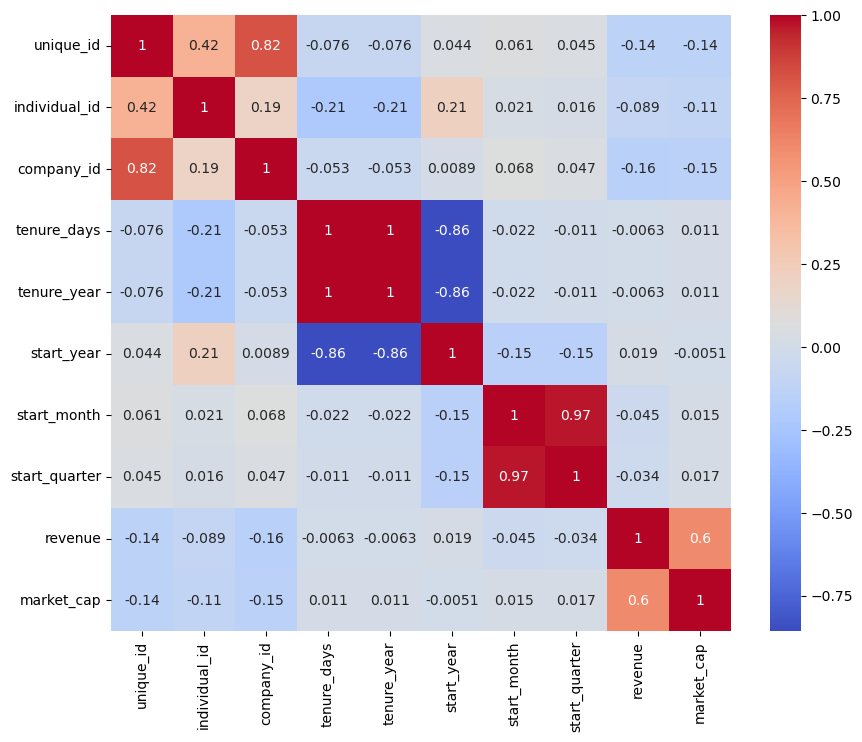

In [55]:
# Correlation matrix: Check the correlation between different numeric variables to see
# if there are any strong relationships between different variables

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = incoming_ceos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


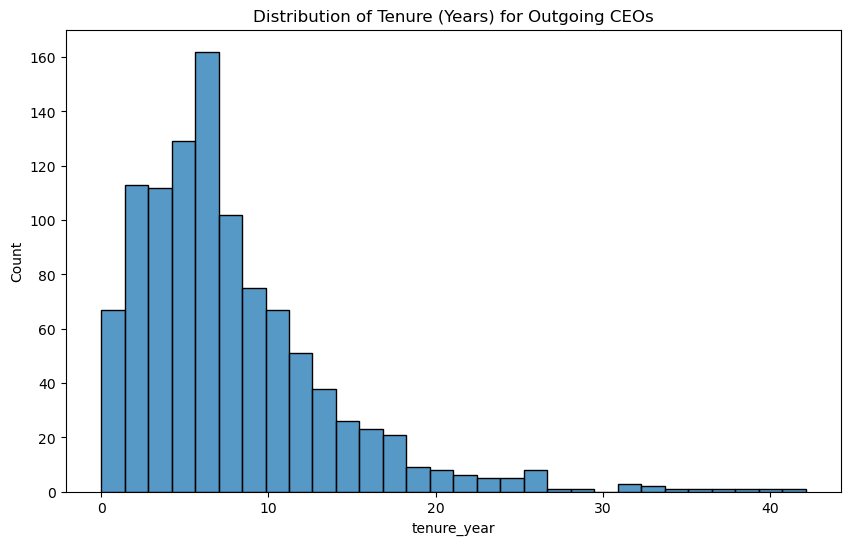

In [61]:
# Visalusation: Histogram for Tenure of outgoing CEOs

plt.figure(figsize=(10, 6))
sns.histplot(data=outgoing_ceos, x="tenure_year", bins=30)
plt.title("Distribution of Tenure (Years) for Outgoing CEOs")
plt.show()

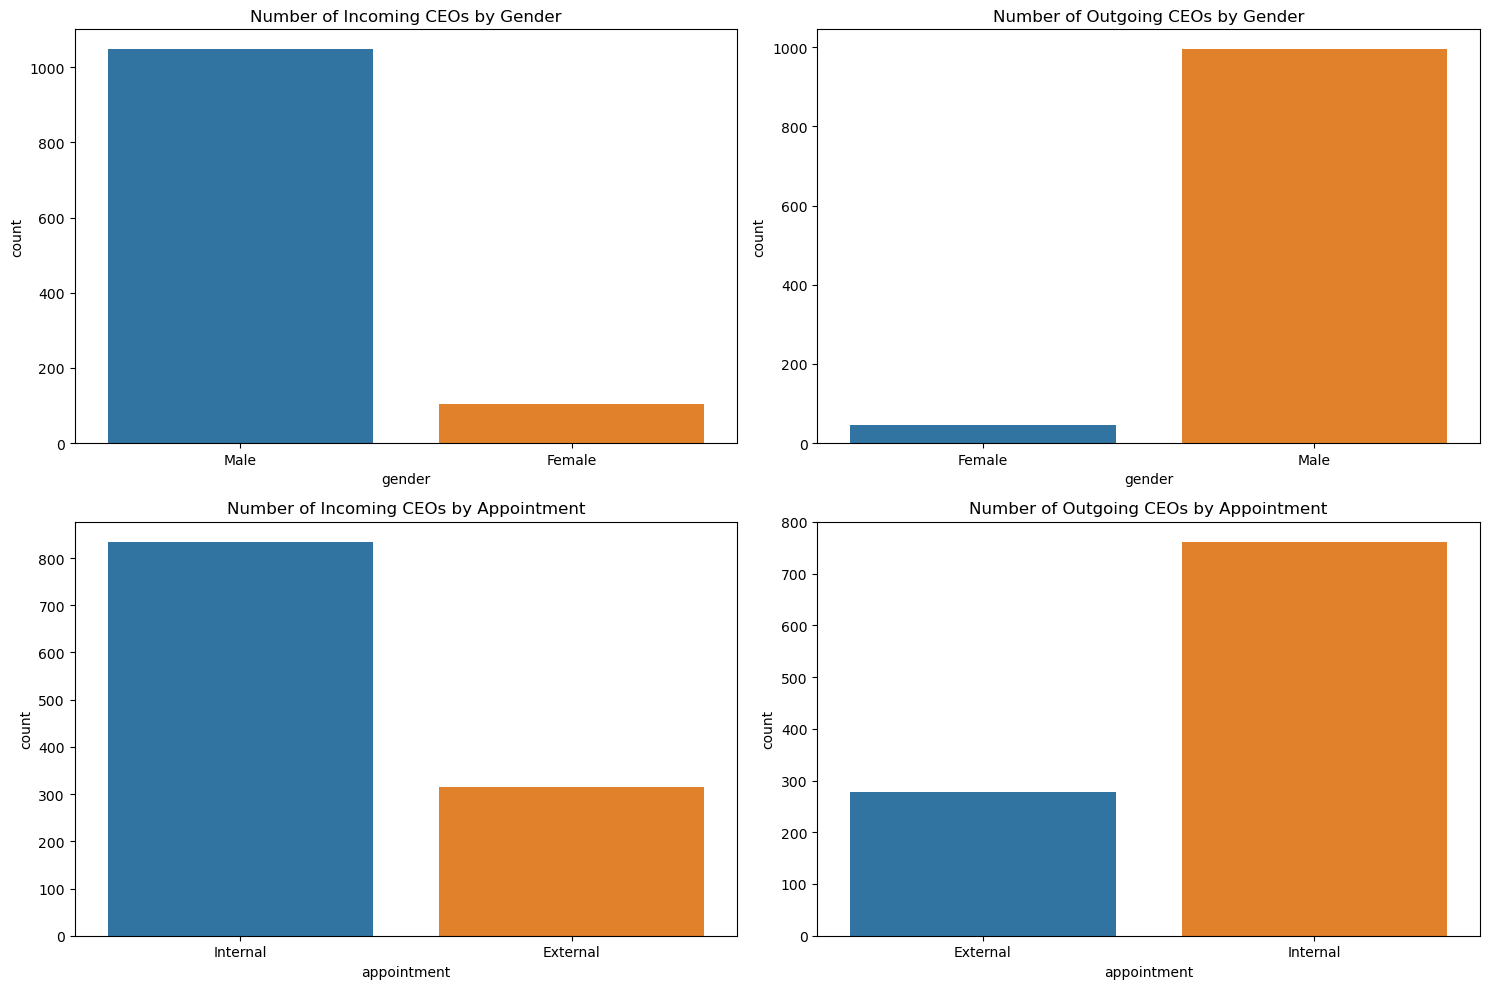

In [65]:
# Visualise data with bar plots

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the first chart
sns.countplot(data=incoming_ceos, x='gender', ax=axs[0, 0])
axs[0, 0].set_title("Number of Incoming CEOs by Gender")

# Plot the second chart
sns.countplot(data=outgoing_ceos, x='gender', ax=axs[0, 1])
axs[0, 1].set_title("Number of Outgoing CEOs by Gender")

# Plot the third chart
sns.countplot(data=incoming_ceos, x='appointment', ax=axs[1, 0])
axs[1, 0].set_title("Number of Incoming CEOs by Appointment")

# Plot the fourth chart
sns.countplot(data=outgoing_ceos, x='appointment', ax=axs[1, 1])
axs[1, 1].set_title("Number of Outgoing CEOs by Appointment")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


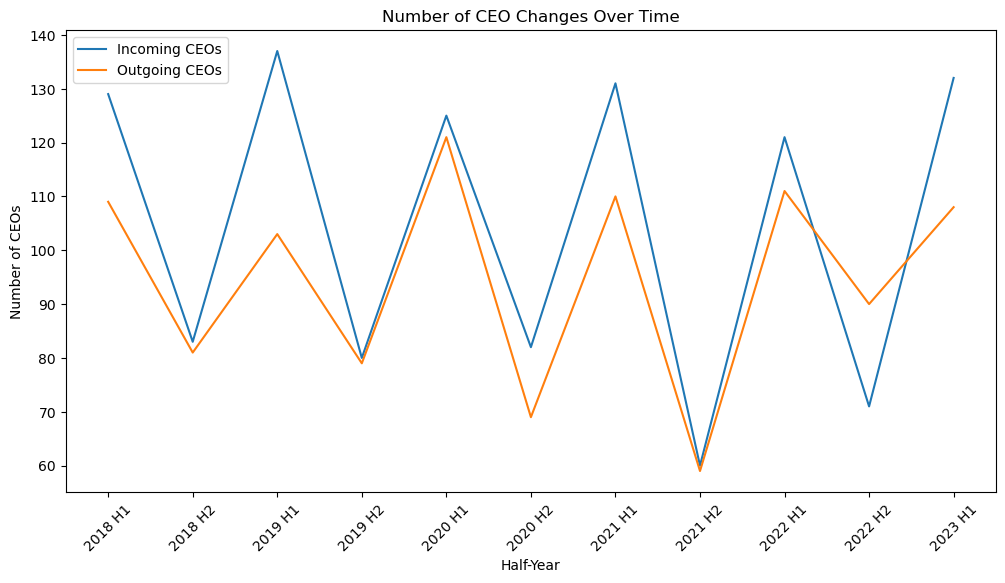

In [70]:
# Time series

# Create a new column for half-year
incoming_ceos['half_year'] = incoming_ceos['start_year'].astype(str) + ' ' + incoming_ceos['start_half']
outgoing_ceos['half_year'] = outgoing_ceos['end_year'].astype(str) + ' ' + outgoing_ceos['end_half']

# Group data by the new half-year column
incoming_ceos_by_half_year = incoming_ceos.groupby(['half_year']).size().reset_index(name='count')
outgoing_ceos_by_half_year = outgoing_ceos.groupby(['half_year']).size().reset_index(name='count')

# Merge the two dataframes
ceos_by_half_year = pd.merge(incoming_ceos_by_half_year.rename(columns={'count': 'incoming'}),
                             outgoing_ceos_by_half_year.rename(columns={'count': 'outgoing'}),
                             on='half_year', how='outer')

# Sort the dataframe by half-year
ceos_by_half_year.sort_values('half_year', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=ceos_by_half_year, x='half_year', y='incoming', label='Incoming CEOs')
sns.lineplot(data=ceos_by_half_year, x='half_year', y='outgoing', label='Outgoing CEOs')
plt.title("Number of CEO Changes Over Time")
plt.xlabel("Half-Year")
plt.ylabel("Number of CEOs")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



## 4. Export data 

In [71]:
# Export data to CSV files to be imported into Tableau
incoming_ceos.to_csv('incoming_ceos_processed.csv', index=False)
outgoing_ceos.to_csv('outgoing_ceos_processed.csv', index=False)
